# 9 Building Feature Based Grammars
-	We ended chapter 8 talking about context free grammars and built some simple grammars.
-	Now we can extend those to feature based grammars, using dictionary style structure, which gives us more flexibility 
-	Therefore, we are going to extend context free grammars to get more fine grained control
-	What is a feature structure, and what kinds of patterns can we program to use them?


# 1 Grammatical Features
-	Previously, we discussed classification where rule number one was figuring out what features you wanted to extract to help classify your different categories. 
-	These were considered "feature extractors' because you told it what features to find, which were then coded as yes/no type relationships.
o	For example, contains the word "true". 
-	We are now going to declare the features we want, rather than just extract them from the data. 


In [1]:
import nltk
## here’s a simple example
kim = {'CAT': 'NP', 'ORTH': 'Kim', 'REF': 'k'}
chase = {'CAT': 'V', 'ORTH': 'chased', 'REL': 'chase'}

- The two variables have a few shared features:
    - CAT: grammatical category
    - ORTH: orthography (spelling)
    - Semantics: REF referent, REL relation
- This example is for a rule based grammar wherein you create pairs of features and values known as **feature structures**. 


-	Feature structures are designed to contain information about the grammatical entities. 
-	You don't have to have a ton of stuff, but could add all sorts of properties. 
-	For example: verbs usually have semantic roles:
    - If you use *chase*, the subject of the sentence plays the role of agent, while the object of the sentence has the role of patient. 


In [2]:
## remember since it’s a dictionary, you can just add more features 
chase['AGT'] = 'sbj'
chase['PAT'] = 'obj'
print(chase)

{'CAT': 'V', 'ORTH': 'chased', 'REL': 'chase', 'AGT': 'sbj', 'PAT': 'obj'}


For example, let's take the sentence *Kim chased Lee*. 
-	We should bind the agent and patient roles to the object. 
-	We can do that by linking the REF feature of the NP (with some simple guesses that it's the NP right by the verb, with no embedded clauses). 
Here's how we might code that:


In [3]:
##sentence
sent = "Kim chased Lee"

##word tokenize
tokens = sent.split()
print(tokens)

##lee structure
lee = {'CAT': 'NP', 'ORTH': 'Lee', 'REF': 'l'}

['Kim', 'chased', 'Lee']


In [4]:
##create a function that reads in the words and spits out the spellings
def lex2fs(word):
     for fs in [kim, lee, chase]:
         if fs['ORTH'] == word:
             return fs

In [5]:
##assign subject, verb, object
subj, verb, obj = lex2fs(tokens[0]), lex2fs(tokens[1]), lex2fs(tokens[2])

##assign agent and object reference link
verb['AGT'] = subj['REF']
verb['PAT'] = obj['REF']

##print it out
for k in ['ORTH', 'REL', 'AGT', 'PAT']:
     print("%-5s => %s" % (k, verb[k]))

ORTH  => chased
REL   => chase
AGT   => k
PAT   => l


-	These labels are not mandatory - often depends on the verb
-	So you might use *source* and *experiencer* for the verb surprise
- Subject and object are often the same, but you might use different labels for the key. 

# 1.1 Syntactic Agreement

Let's think about some sentences:

    a. this dog
    b. *these dog

    a. these dogs
    b. *this dogs



So, we are dealing here with determinant noun agreement. Here's some more examples but with subject verb agreement, with the obnoxious third person present 

    a. the dog runs
    b. *the dog run

    a. the dogs run
    b. *the dogs runs

Therefore, we have EX-RUNS and EXS-RUN.

What would happen if we were coding this as a context free grammar:
		
    S   ->   NP VP
    NP  ->   Det N
    VP  ->   V

    Det  ->  'this'
    N    ->  'dog'
    V    ->  'runs'

-	Unfortunately, this grammar allows us to generate some incorrect sentences, such as this dog runs. 
-	How can we code information so that we only get the correct ones? 
- Mainly the answer is to get more detailed in the grammar and part of speech labeling. 


    S -> NP_SG VP_SG
    S -> NP_PL VP_PL
    NP_SG -> Det_SG N_SG
    NP_PL -> Det_PL N_PL
    VP_SG -> V_SG
    VP_PL -> V_PL

    Det_SG -> 'this'
    Det_PL -> 'these'
    N_SG -> 'dog'
    N_PL -> 'dogs'
    V_SG -> 'runs'
    V_PL -> 'run'

-	Instead of a single S option, we have two separate options now – one with singular NP and one with plural NP. 
-	Here we have doubled the grammar size – doesn’t seem like a big deal until you realize the possible combinations of the different options in English alone … how can we deal with these different combinations without blowing up our machines? 

# 1.2 Using Attributes and Constraints
-	Linguistic categories have properties – like a noun can be plural or a verb can be past tense.
-	N[NUM=pl] for Noun[Number is plural]
-   Noun[NUMBER=plural]
-	We can do that in our dictionary as well

    Det[NUM=sg] -> 'this'
    Det[NUM=pl] -> 'these'

    N[NUM=sg] -> 'dog'
    N[NUM=pl] -> 'dogs'
    V[NUM=sg] -> 'runs'
    V[NUM=pl] -> 'run'

-	Why should we do this type of thing? 
-	Well it allows us to use these as variables for feature values as shown below

    S -> NP[NUM=?n] VP[NUM=?n]
    
    NP[NUM=?n] -> Det[NUM=?n] N[NUM=?n]
    
    VP[NUM=?n] -> V[NUM=?n]



- Basically the ?n is a variable that changes based on NUM’s categories, so it can be single (sg) or plural (pl). 
- By using this formatting, we are restricting nouns and verbs to have the same feature NUM.


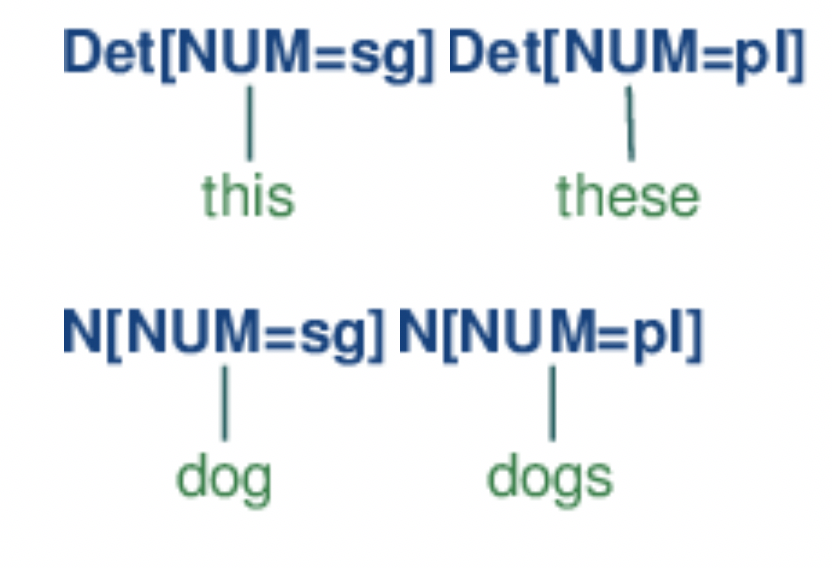

In [6]:
from IPython.display import Image
Image("lesson9-tree1.png")

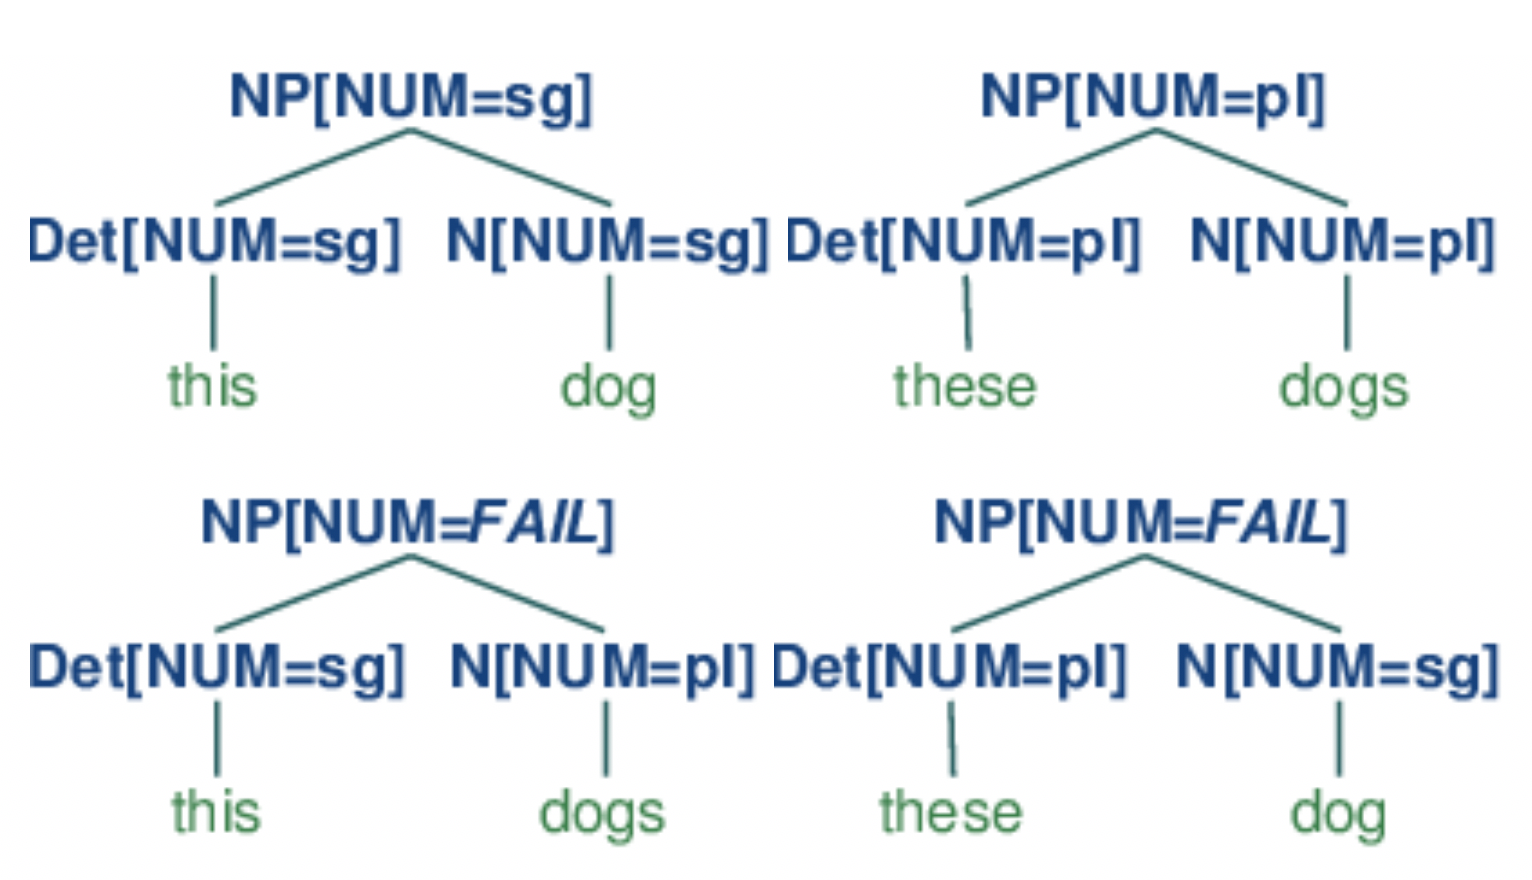

In [7]:
Image("lesson9-tree2.png")

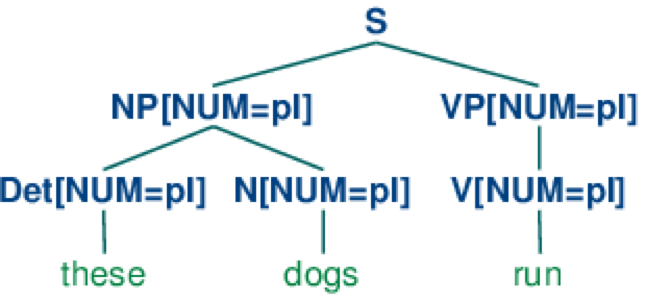

In [8]:
Image("lesson9-tree3.png")

- However, we have to deal with the fact that we don't have determinants that are picky about plurals 

Det[NUM=?n] -> 'the' | 'some' | 'any'

In [9]:
nltk.data.show_cfg('grammars/book_grammars/feat0.fcfg')

% start S
# ###################
# Grammar Productions
# ###################
# S expansion productions
S -> NP[NUM=?n] VP[NUM=?n]
# NP expansion productions
NP[NUM=?n] -> N[NUM=?n] 
NP[NUM=?n] -> PropN[NUM=?n] 
NP[NUM=?n] -> Det[NUM=?n] N[NUM=?n]
NP[NUM=pl] -> N[NUM=pl] 
# VP expansion productions
VP[TENSE=?t, NUM=?n] -> IV[TENSE=?t, NUM=?n]
VP[TENSE=?t, NUM=?n] -> TV[TENSE=?t, NUM=?n] NP
# ###################
# Lexical Productions
# ###################
Det[NUM=sg] -> 'this' | 'every'
Det[NUM=pl] -> 'these' | 'all'
Det -> 'the' | 'some' | 'several'
PropN[NUM=sg]-> 'Kim' | 'Jody'
N[NUM=sg] -> 'dog' | 'girl' | 'car' | 'child'
N[NUM=pl] -> 'dogs' | 'girls' | 'cars' | 'children' 
IV[TENSE=pres,  NUM=sg] -> 'disappears' | 'walks'
TV[TENSE=pres, NUM=sg] -> 'sees' | 'likes'
IV[TENSE=pres,  NUM=pl] -> 'disappear' | 'walk'
TV[TENSE=pres, NUM=pl] -> 'see' | 'like'
IV[TENSE=past] -> 'disappeared' | 'walked'
TV[TENSE=past] -> 'saw' | 'liked'


In [10]:
#here's an example of how you would use it
tokens = 'Kim likes children'.split()
from nltk import load_parser  
cp = load_parser('grammars/book_grammars/feat0.fcfg', trace=2)   
for tree in cp.parse(tokens):
     print(tree)

|.Kim .like.chil.|
Leaf Init Rule:
|[----]    .    .| [0:1] 'Kim'
|.    [----]    .| [1:2] 'likes'
|.    .    [----]| [2:3] 'children'
Feature Bottom Up Predict Combine Rule:
|[----]    .    .| [0:1] PropN[NUM='sg'] -> 'Kim' *
Feature Bottom Up Predict Combine Rule:
|[----]    .    .| [0:1] NP[NUM='sg'] -> PropN[NUM='sg'] *
Feature Bottom Up Predict Combine Rule:
|[---->    .    .| [0:1] S[] -> NP[NUM=?n] * VP[NUM=?n] {?n: 'sg'}
Feature Bottom Up Predict Combine Rule:
|.    [----]    .| [1:2] TV[NUM='sg', TENSE='pres'] -> 'likes' *
Feature Bottom Up Predict Combine Rule:
|.    [---->    .| [1:2] VP[NUM=?n, TENSE=?t] -> TV[NUM=?n, TENSE=?t] * NP[] {?n: 'sg', ?t: 'pres'}
Feature Bottom Up Predict Combine Rule:
|.    .    [----]| [2:3] N[NUM='pl'] -> 'children' *
Feature Bottom Up Predict Combine Rule:
|.    .    [----]| [2:3] NP[NUM='pl'] -> N[NUM='pl'] *
Feature Bottom Up Predict Combine Rule:
|.    .    [---->| [2:3] S[] -> NP[NUM=?n] * VP[NUM=?n] {?n: 'pl'}
Feature Single Edge Fundame

# 1.3 Terminology
-	Atomic values are objects that cannot be further broken down, like singular and plural
-	Boolean: true/false options that are atomic but allow us to be specific on properties

    V[TENSE=pres, +AUX] -> 'can'
    
    V[TENSE=pres, +AUX] -> 'may'

    V[TENSE=pres, -AUX] -> 'walks'
    
    V[TENSE=pres, -AUX] -> 'likes'

- Complex values are features in feature sets
- We can represent complex values in attribute value matrices (AVM)

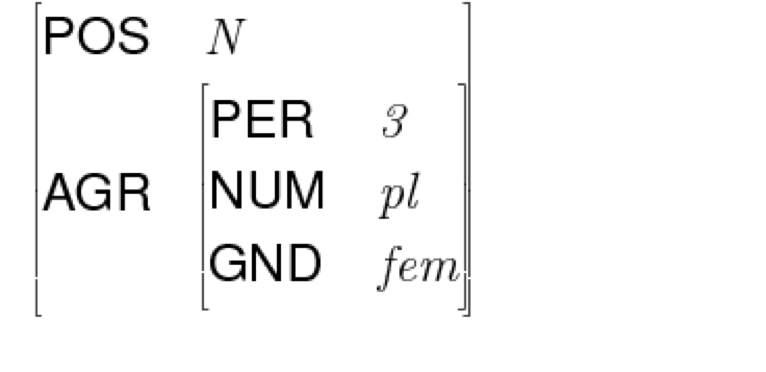

In [11]:
Image("lesson9-avm.png")

# 2 Processing Feature Structures
-	Feature structures in NLTK are declared with the FeatStruct() constructor. 
-	Atomic feature values can be strings or integers.
- Feature structures are basically dictionaries, so we can use it like one


In [12]:
fs1 = nltk.FeatStruct(TENSE='past', NUM='sg')
print(fs1)

[ NUM   = 'sg'   ]
[ TENSE = 'past' ]


In [13]:
fs1 = nltk.FeatStruct(PER=3, NUM='pl', GND='fem')
print(fs1['GND'])
fs1['CASE'] = 'acc'
print(fs1)

fem
[ CASE = 'acc' ]
[ GND  = 'fem' ]
[ NUM  = 'pl'  ]
[ PER  = 3     ]


In [14]:
# We can also define feature structures that have complex values
fs2 = nltk.FeatStruct(POS='N', AGR=fs1)
print(fs2)
print(fs2['AGR']['PER'])

[       [ CASE = 'acc' ] ]
[ AGR = [ GND  = 'fem' ] ]
[       [ NUM  = 'pl'  ] ]
[       [ PER  = 3     ] ]
[                        ]
[ POS = 'N'              ]
3


In [15]:
#here’s an alterative way to define them
#although I think the first way makes more sense 
print(nltk.FeatStruct("[POS='N', AGR=[PER=3, NUM='pl', GND='fem']]"))

[       [ GND = 'fem' ] ]
[ AGR = [ NUM = 'pl'  ] ]
[       [ PER = 3     ] ]
[                       ]
[ POS = 'N'             ]


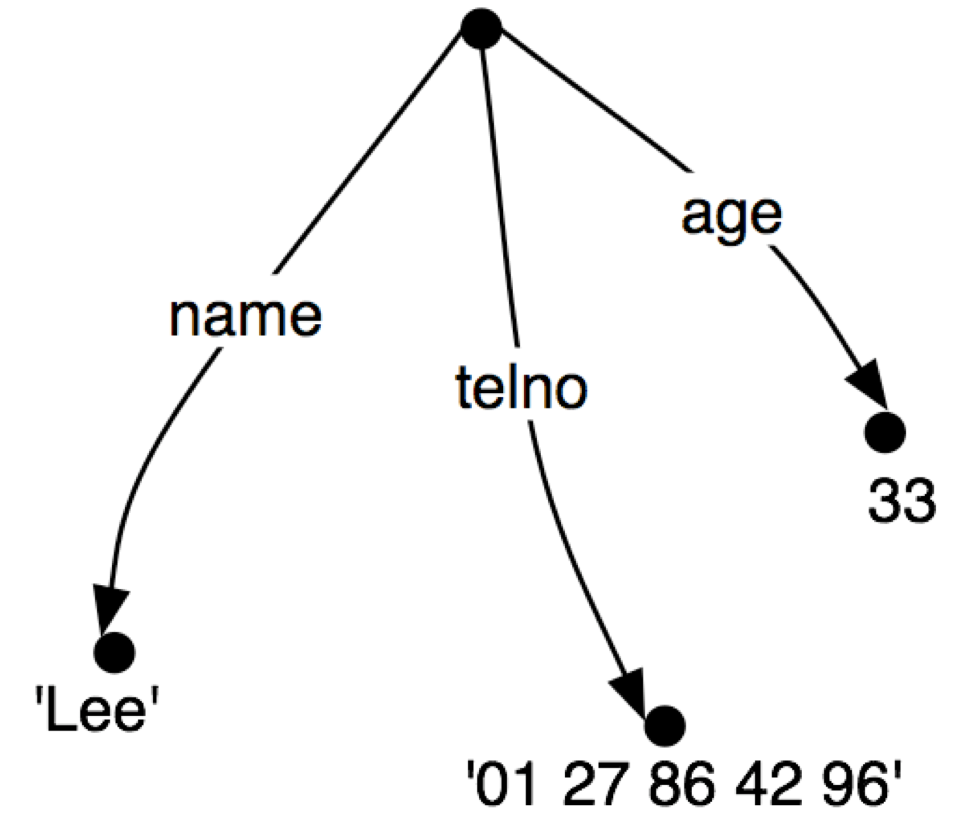

In [16]:
Image("lesson9-dag1.png")

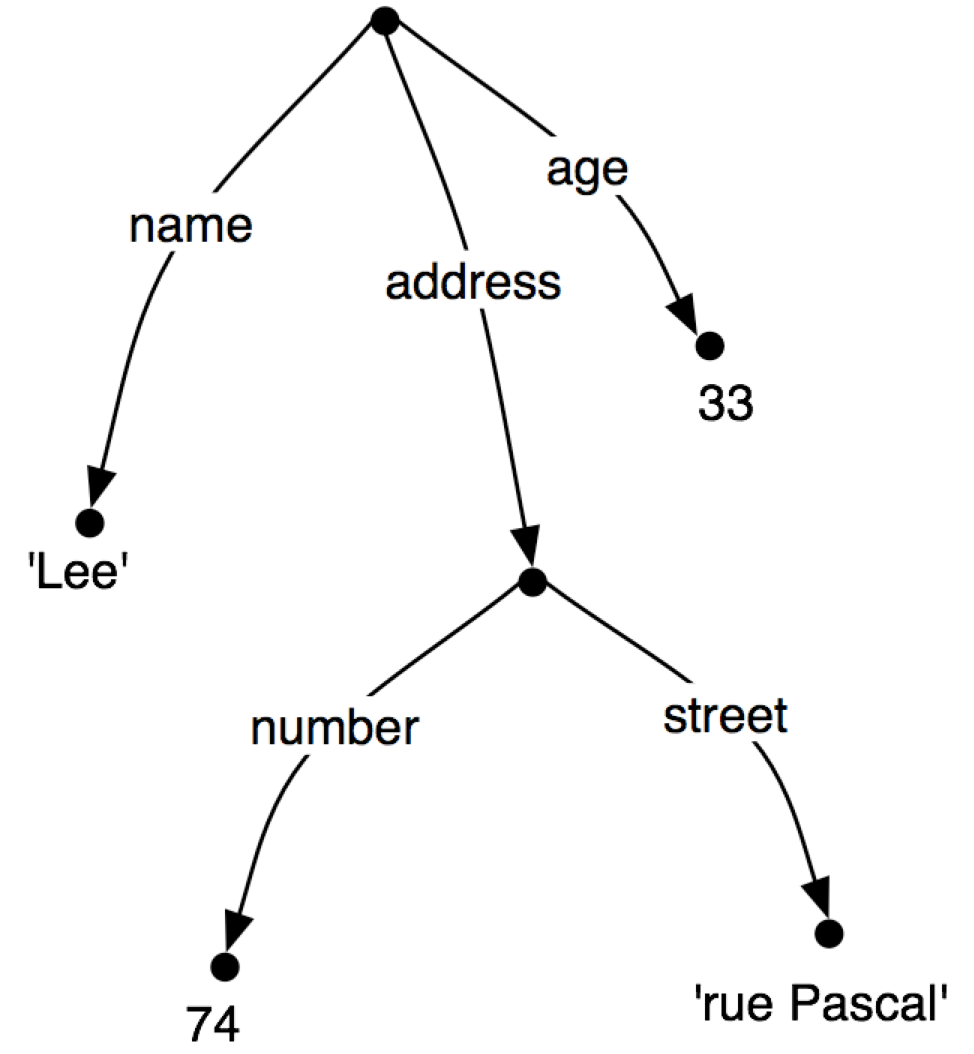

In [17]:
Image("lesson9-dag2.png")

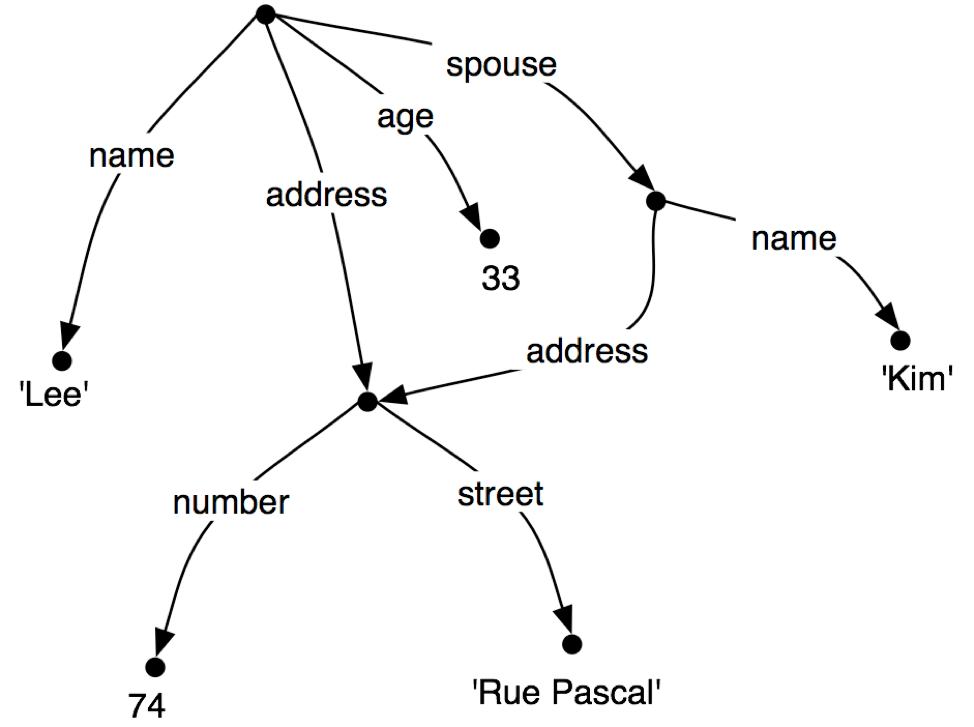

In [18]:
Image("lesson9-dag3.png")

# 3   Extending a Feature based Grammar

# 3.1   Subcategorization

-	We previously discussed how to build a better representation of sentences and know what to put in each slot by categorizing each verb a bit more specifically. 
    - VP -> IV
    - VP -> TV NP
-	However, by doing this, we limit what we can do by searching and indexing because IV appears to be different category than V (even though they are nested categories).


Instead we might try: 

- VP[TENSE=?t, NUM=?n] -> V[SUBCAT=intrans, TENSE=?t, NUM=?n]
- VP[TENSE=?t, NUM=?n] -> V[SUBCAT=trans, TENSE=?t, NUM=?n] NP
- VP[TENSE=?t, NUM=?n] -> V[SUBCAT=clause, TENSE=?t, NUM=?n] SBar


-	This approach is called **Generalized Phrase Structure Grammar** and uses the *SUBCAT* option to denote which category the verb falls into. 


Now we can build examples: 

- V[SUBCAT=intrans, TENSE=pres, NUM=sg] -> 'disappears' | 'walks'
- V[SUBCAT=trans, TENSE=pres, NUM=sg] -> 'sees' | 'likes'
- V[SUBCAT=clause, TENSE=pres, NUM=sg] -> 'says' | 'claims'


- V[SUBCAT=intrans, TENSE=pres, NUM=pl] -> 'disappear' | 'walk'
- V[SUBCAT=trans, TENSE=pres, NUM=pl] -> 'see' | 'like'
- V[SUBCAT=clause, TENSE=pres, NUM=pl] -> 'say' | 'claim'


- V[SUBCAT=intrans, TENSE=past, NUM=?n] -> 'disappeared' | 'walked'
- V[SUBCAT=trans, TENSE=past, NUM=?n] -> 'saw' | 'liked'
- V[SUBCAT=clause, TENSE=past, NUM=?n] -> 'said' | 'claimed'


-	What is SBar though?
-	Use SBar as a marker for subordinate clauses
-	Example from context free grammar (last chapter):
    - SBar -> Comp S
    - Comp -> 'that'



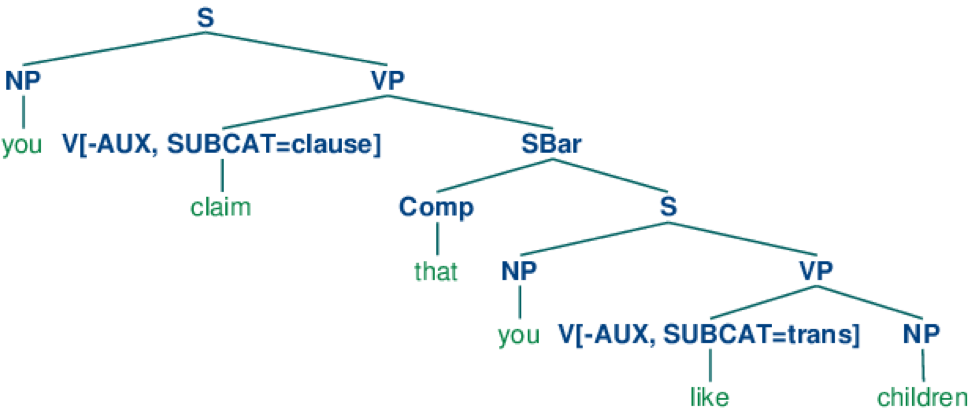

In [19]:
#In a feature based grammar, we might see a sentence break down like this:
Image("lesson9-fbgtree.png")

# 3.2   Heads Revisited
-	Remember that the head of a phrase is the first word
-	Generally, this is N in a NP, V in a VP etc.
-	The child is the rest of the phrase
-	We might want to include ways to connect the head/child relationship

-	X-bar syntax allows us to show the levels of a sentence
-	For example (for a noun), you might see N – this would represent the word/lexical level. 
-	N’ would represent the next level up from the literal word, while N’’ represents to levels up. 

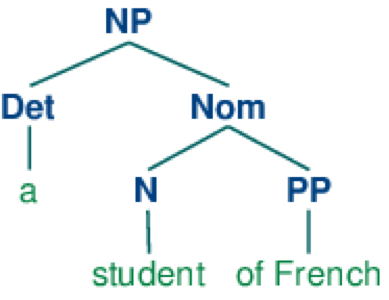

In [20]:
#old way
Image("lesson9-xbarold.png")

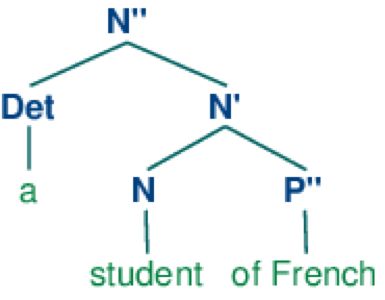

In [21]:
#new way 
Image("lesson9-xbar.png")

-	Why would we use this type of structure?
-	The head would be considered N, while the ‘ and ‘’ are called projections, sometimes phrasal projections 
-	Using these, we can tell if the projections share the same structure 
-	You  can code these by using a recursive rule to expand the BAR part of the dictionary structure

    - S -> N[BAR=2] V[BAR=2]
    - N[BAR=2] -> Det N[BAR=1]
    - N[BAR=1] -> N[BAR=1] P[BAR=2]
    - N[BAR=1] -> N[BAR=0] P[BAR=2]
    - N[BAR=1] -> N[BAR=0]XS

# 3.3 Auxiliary Verbs and Inversion
-	An **inverted clause** is when the subject and verb order are switched
-	Often occurs with questions and special types of adverbs
    -	Do you like children?
    -	Rarely do you see Kim. 
-	Not every verb can be used for inverted clauses:
    - *Like you children?
    - *Rarely see you Kim.


- Verbs that are part of inverted clauses are called **auxiliaries**
- Examples include do, can, have, will shall 
- In the grammar, we might use `S[+INV] -> V[+AUX] NP VP` to capture that relationship

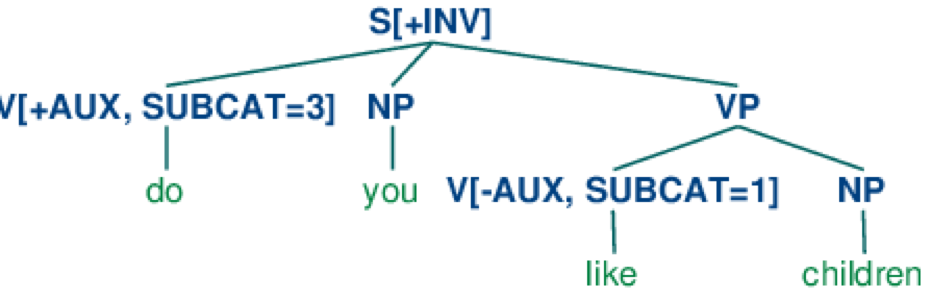

In [22]:
Image("lesson9-inverted.png")

# 3.4   Unbounded Dependency Constructions
-	With some words, the complements are obligatory, such as *put* and *like*. 
-	Therefore, you can’t say: He put or He like (some slang options here).
-	However, there are some times when you can omit the complement:
    - Which card do you put into the slot?
    - Kim knows what you like.
-	You would need an appropriate filler to omit the complement. 

-	These types of sentences are sometimes understood to have “gaps” where the complement is implied but omitted:
    - Which card do you put __ into the slot?
-	You can only make these sentences work though, **if** you include the gap, otherwise they are awkward:
    - *Which card do you put this into the slot?


- The relationship between a filler and a gap is a called a **dependency**. 
- What can we put between fillers and the gaps? Is there a set of rules that govern what options occur between these?
- Short answer is no: because of the recursion properties in language. 

- Slash categories are Y/XP
- There is a phrase Y that is missing a XP constituent because of the filler/gap rules
- So, S/NP is sentence (S) that is missing a NP. 

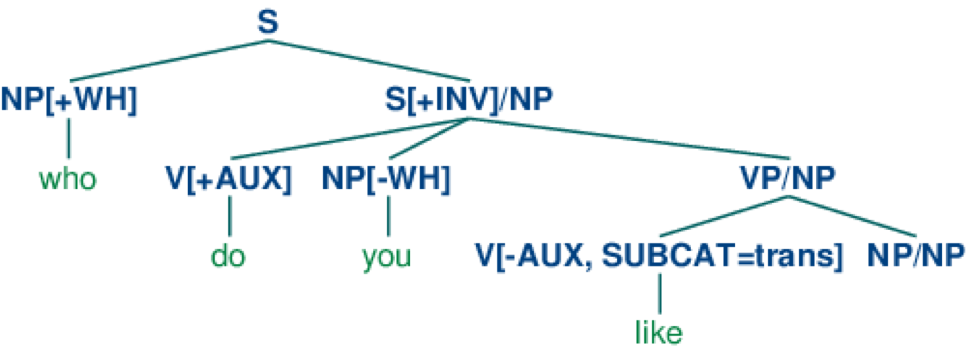

In [23]:
Image("lesson9-slash.png")

In [24]:
#we can incorporate them with [SLASH] features in our grammar dictionary
nltk.data.show_cfg('grammars/book_grammars/feat1.fcfg')

% start S
# ###################
# Grammar Productions
# ###################
S[-INV] -> NP VP
S[-INV]/?x -> NP VP/?x
S[-INV] -> NP S/NP
S[-INV] -> Adv[+NEG] S[+INV]
S[+INV] -> V[+AUX] NP VP
S[+INV]/?x -> V[+AUX] NP VP/?x
SBar -> Comp S[-INV]
SBar/?x -> Comp S[-INV]/?x
VP -> V[SUBCAT=intrans, -AUX]
VP -> V[SUBCAT=trans, -AUX] NP
VP/?x -> V[SUBCAT=trans, -AUX] NP/?x
VP -> V[SUBCAT=clause, -AUX] SBar
VP/?x -> V[SUBCAT=clause, -AUX] SBar/?x
VP -> V[+AUX] VP
VP/?x -> V[+AUX] VP/?x
# ###################
# Lexical Productions
# ###################
V[SUBCAT=intrans, -AUX] -> 'walk' | 'sing'
V[SUBCAT=trans, -AUX] -> 'see' | 'like'
V[SUBCAT=clause, -AUX] -> 'say' | 'claim'
V[+AUX] -> 'do' | 'can'
NP[-WH] -> 'you' | 'cats'
NP[+WH] -> 'who'
Adv[+NEG] -> 'rarely' | 'never'
NP/NP ->
Comp -> 'that'


-	This grammar contains the gap/filler parts like this one `S[-INV] -> NP S/NP`
-	So options like this one `VP/?x -> V SBar/?x` says that the VP can be slashes if it matches a SBar option for slashing. 

In [25]:
tokens = 'who do you claim that you like'.split()
from nltk import load_parser
cp = load_parser('grammars/book_grammars/feat1.fcfg')
for tree in cp.parse(tokens):
     print(tree)

(S[-INV]
  (NP[+WH] who)
  (S[+INV]/NP[]
    (V[+AUX] do)
    (NP[-WH] you)
    (VP[]/NP[]
      (V[-AUX, SUBCAT='clause'] claim)
      (SBar[]/NP[]
        (Comp[] that)
        (S[-INV]/NP[]
          (NP[-WH] you)
          (VP[]/NP[] (V[-AUX, SUBCAT='trans'] like) (NP[]/NP[] )))))))


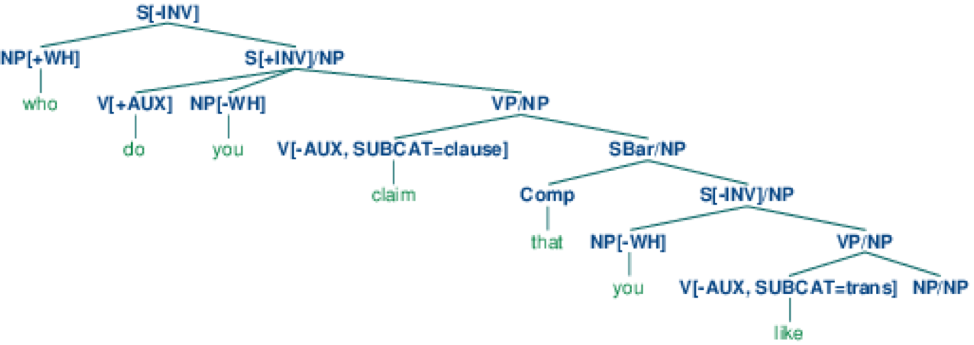

In [26]:
#here’s a visual of that tree
Image("lesson9-slashtree.png")

# 3.5   Case and Gender in German

-	Here’s an example with a language that includes gendered terms for the/a

    - Case	Masc	Fem	Neut	Plural
    - Nom	der	die	das	die
    - Gen	des	der	des	der
    - Dat	dem	der	dem	den
    - Acc	den	die	das	die
    
-	Use *objcase* to help specify the how the verb is related to the object

In [27]:
#example feature grammar for german
nltk.data.show_cfg('grammars/book_grammars/german.fcfg')

% start S
# Grammar Productions
S -> NP[CASE=nom, AGR=?a] VP[AGR=?a]
NP[CASE=?c, AGR=?a] -> PRO[CASE=?c, AGR=?a]
NP[CASE=?c, AGR=?a] -> Det[CASE=?c, AGR=?a] N[CASE=?c, AGR=?a]
VP[AGR=?a] -> IV[AGR=?a]
VP[AGR=?a] -> TV[OBJCASE=?c, AGR=?a] NP[CASE=?c]
# Lexical Productions
# Singular determiners
# masc
Det[CASE=nom, AGR=[GND=masc,PER=3,NUM=sg]] -> 'der' 
Det[CASE=dat, AGR=[GND=masc,PER=3,NUM=sg]] -> 'dem'
Det[CASE=acc, AGR=[GND=masc,PER=3,NUM=sg]] -> 'den'
# fem
Det[CASE=nom, AGR=[GND=fem,PER=3,NUM=sg]] -> 'die' 
Det[CASE=dat, AGR=[GND=fem,PER=3,NUM=sg]] -> 'der'
Det[CASE=acc, AGR=[GND=fem,PER=3,NUM=sg]] -> 'die' 
# Plural determiners
Det[CASE=nom, AGR=[PER=3,NUM=pl]] -> 'die' 
Det[CASE=dat, AGR=[PER=3,NUM=pl]] -> 'den' 
Det[CASE=acc, AGR=[PER=3,NUM=pl]] -> 'die' 
# Nouns
N[AGR=[GND=masc,PER=3,NUM=sg]] -> 'Hund'
N[CASE=nom, AGR=[GND=masc,PER=3,NUM=pl]] -> 'Hunde'
N[CASE=dat, AGR=[GND=masc,PER=3,NUM=pl]] -> 'Hunden'
N[CASE=acc, AGR=[GND=masc,PER=3,NUM=pl]] -> 'Hunde'
N[AGR=[GND=fem,PER=3,

In [30]:
tokens = 'ich folge den Katzen'.split()
cp = load_parser('grammars/book_grammars/german.fcfg')
for tree in cp.parse(tokens):
     print(tree)


(S[]
  (NP[AGR=[NUM='sg', PER=1], CASE='nom']
    (PRO[AGR=[NUM='sg', PER=1], CASE='nom'] ich))
  (VP[AGR=[NUM='sg', PER=1]]
    (TV[AGR=[NUM='sg', PER=1], OBJCASE='dat'] folge)
    (NP[AGR=[GND='fem', NUM='pl', PER=3], CASE='dat']
      (Det[AGR=[NUM='pl', PER=3], CASE='dat'] den)
      (N[AGR=[GND='fem', NUM='pl', PER=3]] Katzen))))


-	When you are developing a grammar, it can be difficult to figure out why / where a parser breaks down.
-	Using the trace option will allow you to see when and why it fails. 

In [29]:
tokens = 'ich folge den Katze'.split()
cp = load_parser('grammars/book_grammars/german.fcfg', trace=2)
for tree in cp.parse(tokens):
     print(tree)
#fails because there are two options for den

|.ich.fol.den.Kat.|
Leaf Init Rule:
|[---]   .   .   .| [0:1] 'ich'
|.   [---]   .   .| [1:2] 'folge'
|.   .   [---]   .| [2:3] 'den'
|.   .   .   [---]| [3:4] 'Katze'
Feature Bottom Up Predict Combine Rule:
|[---]   .   .   .| [0:1] PRO[AGR=[NUM='sg', PER=1], CASE='nom'] -> 'ich' *
Feature Bottom Up Predict Combine Rule:
|[---]   .   .   .| [0:1] NP[AGR=[NUM='sg', PER=1], CASE='nom'] -> PRO[AGR=[NUM='sg', PER=1], CASE='nom'] *
Feature Bottom Up Predict Combine Rule:
|[--->   .   .   .| [0:1] S[] -> NP[AGR=?a, CASE='nom'] * VP[AGR=?a] {?a: [NUM='sg', PER=1]}
Feature Bottom Up Predict Combine Rule:
|.   [---]   .   .| [1:2] TV[AGR=[NUM='sg', PER=1], OBJCASE='dat'] -> 'folge' *
Feature Bottom Up Predict Combine Rule:
|.   [--->   .   .| [1:2] VP[AGR=?a] -> TV[AGR=?a, OBJCASE=?c] * NP[CASE=?c] {?a: [NUM='sg', PER=1], ?c: 'dat'}
Feature Bottom Up Predict Combine Rule:
|.   .   [---]   .| [2:3] Det[AGR=[GND='masc', NUM='sg', PER=3], CASE='acc'] -> 'den' *
|.   .   [---]   .| [2:3] Det[AGR=[